<a href="https://colab.research.google.com/github/lucianobajr/CCF-425/blob/main/first_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeira Unidade

* Estatística Descritiva
* Teorema Central do Limite
* Inferência Estatística
* Tratamento de Dados
* Visualização de Dados

## Estatística descritiva

`População`: conjunto de elementos que tem pelo menos uma característica em comum.
Esta característica deve delimitar corretamente quais são os elementos da população que podem ser animados ou inanimados.

`Amostra`: subconjunto de elementos de uma população. Este subconjunto deve ter
dimensão menor que o da população e seus elementos devem ser representativos da população. A seleção dos elementos que irão compor a amostra pode ser feita de várias maneiras e irá depender do conhecimento que se tem da população e da quantidade de recursos disponíveis. A 
estatística inferencial é a área que trata e apresenta a metodologia de amostragem. 

`Variável`: é a característica que vai ser observada, medida ou contada nos elementos da população ou da amostra e que pode variar, ou seja, assumir um valor diferente de elemento para elemento. 

![untitled](https://user-images.githubusercontent.com/45442173/175169239-fc970da7-1d72-4b94-862d-691f493cd076.png)

A estatística descritiva é um ramo da estatística que aplica várias técnicas para descrever e sumarizar um conjunto de dados. Sendo assim, este ramo pode: 
* Gerar cálculos para reduzir um complexo arranjo de dados a um punhado de números que descrevam esses dados 
* Nos dão um resumo manejável e significativo dos fenômenos descritos nos dados

### Cálculos matemáticos
Logo, a estatística descritiva não é apenas o cálculo das medidas de tendência central. A `média` é uma estatística descritiva que deve ser usada com cuidado já que é sensível a valores extremos (*outliers*), que são observações que se situam mais longe do centro. A `mediana` é ponto que divide a distribuição ao meio, significando que metade das observações está acima da mediana, e metade abaixo porém ao contrário da média não é sensível a *outliers*.

A `variância`, uma medida de dispersão que mostra quão distantes os valores estão da média. Já o `desvio padrão` é uma medida que expressa o grau de dispersão de um conjunto de dados. Ou seja, o desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.

Em estatística descritiva, os `percentis` são medidas que dividem a amostra em 100 partes, cada uma com uma percentagem de dados aproximadamente igual.

Em estatística, `zscore` é o número de desvios padrão pelos quais o valor de uma pontuação bruta está acima ou abaixo do valor médio do que está sendo observado ou medido

### Explorando dados 

In [46]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [1]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

--2022-06-22 23:25:54--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv’

drinks.csv          100%[===================>]   4.28K  --.-KB/s    in 0s      

2022-06-22 23:25:54 (48.0 MB/s) - ‘drinks.csv’ saved [4384/4384]



In [33]:
# lendo o arquivo csv
dataset = pd.read_csv("drinks.csv")
dataset

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [7]:
dataset.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
dataset.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [30]:
dataset.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [13]:
# Média
mean = dataset['beer_servings'].mean()

# Moda
mode = dataset['beer_servings'].mode()

# Mediana
median = dataset['beer_servings'].median()

print("Média = %.02f, Moda = %.02f, Mediana = %.02f"%(mean,mode,median))

Média = 106.16, Moda = 0.00, Mediana = 76.00,


In [16]:
# Variância
var = dataset['beer_servings'].var()

# Desvio padrão
std = dataset['beer_servings'].std()

print("Variância = %.02f, Desvio padrão = %.02f"%(var,std))

Variância = 10229.93, Desvio padrão = 101.14


In [17]:
# Maior valor
max = dataset['beer_servings'].max()

# Menor valor
min = dataset['beer_servings'].min()

print("Maior valor = %.02f, Menor valor = %.02f"%(max,min))

Maior valor = 376.00, Menor valor = 0.00


In [39]:
# Quantos desvios padrões da média

zscore = lambda x, mean, std: (x-mean)/std 
zscore(188, mean, std)

0.809144431836385

## Teorema Central do Limite

Uma razão pela qual a distribuição normal é tão útil é o teorema central do limite, que diz (em essência) que uma variável aleatória definida como a média (ou soma) de um grande número de variáveis aleatórias independentes e identicamente distribuídas é aproximadamente distribuída normalmente. Em outras palavras, a distribuição amostral de médias segue uma normal.

Em detalhes, se $X_1, ..., X_n$ são variáveis aleatórias. Em particular, todas as VAs foram amostradas de uma mesma população com média $\mu$ (finita), desvio padrão $\sigma$ (finito). Além do mais, a geração de cada VA é independente da outra, sendo todas identicamente distribuídas. Quando $n$ é grande, então

$$\frac{1}{n}(X_1 + \cdots + X_n)$$

é aproximadamente distribuído por uma Normal com média $\mu$ e desvio padrão $\sigma/\sqrt{n}$. De forma equivalente (mas muitas vezes mais útil), 

$$Z = \frac{(X_1 + \cdots + X_n) - \mu }{\sigma / \sqrt{n}}$$

é aproximadamente uma normal com média 0 e desvio padrão 1.

$$Z \sim Normal(0, 1).$$

### Como transformar VAs?

Lemebre-se da aula passada que sabemos estimar:

$$\bar{x} \approx \mu$$

e 

$$s^2 \approx \sigma$$

Além do mais, sabemos que a variância do estimador da média é:

$$Var(\hat{\mu}) = \frac{\sigma^2}{n}$$

Assim:

\begin{align}
\bar{X} \sim Normal(\mu, \frac{\sigma^2}{n}) \\
\bar{X}- \mu \sim Normal(0, \frac{\sigma^2}{n}) \\
\frac{\bar{X}- \mu}{\sigma / \sqrt{n}} \sim Normal(0, 1) \\
\end{align}

O `erro padrão` é o desvio padrão das médias de amostras.Um erro padrão grande significa que as médias das amostras estão esparsamente espalhadas em torno da média da população e um erro padrão pequeno significa que as médias das amostras estão relativamente aglomeradas em torno da média

Sabemos pelo teorema central do limite que as médias de amostras se situam dentro de três erros padrões da média da população, então este deve ser o ponto a ser analisado já que se verdadeiro a amostra pertence a população

## Inferência Estatística
Inferência estatística é o processo pelo qual os
dados falam conosco, possibilitando-nos tirar
conclusões significativas

### Testes de Hipótese

*   Hipótese Nula implícita ou explícita

  *    Premissa de partida, que será rejeitada ou não
  * Se rejeitada, aceitamos alguma hipótese alternativa que seja mais consistente com os dados observados
  * Não será provada verdadeira; apenas pode-se falhar em rejeitá-la


*    Hipótese Alternativa
  * Conclusão que precisa ser verdadeira se é para rejeitar a hipótese nula

Podemos rejeitar a hipótese nula no nível 0,05 se a chance de obter um resultado no mínimo tão extremo quanto o que observamos se a hipótese nula for verdadeira for menor que 5%. Na estatística clássica, o `valor-p`, é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula.




Com base nos dados anteriores, nota-se que se consome mais cerveja do que vinho em média. Porém há diferença significativa em relação às médias?

* Hipótese nula: não há diferença

In [45]:
''' 
- Se p > 0.05 aceita-se a hipótese nula
- Se p <= 0.05 rejeita-se a hipótese nula
'''
from scipy.stats import norm,ttest_ind

pvalue = ttest_ind(dataset['beer_servings'],dataset['wine_servings']).pvalue
print(f"P-valor: {pvalue}")
print("Aceita-se a hipótese nula") if (pvalue > (0.05)) else print("Rejeita-se a hipótese nula")

P-valor: 2.3346193715127866e-09
Rejeita-se a hipótese nula


Já que rejeita-se a hipótese nula, podemos afirmar que há diferença

## Visualização

### Gráfico de barra

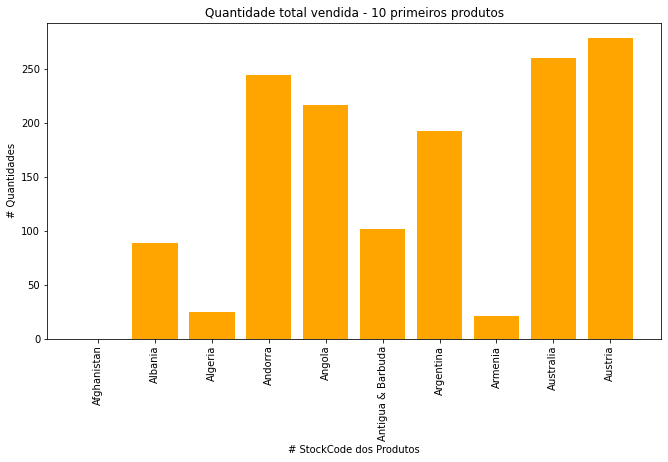

In [63]:
plt.figure(figsize =(11, 6))
plt.bar(dataset['country'][0:10],dataset['beer_servings'][0:10], color = 'orange')
plt.ylabel("# Quantidades")
plt.xlabel("# Países ")
plt.title("Quantidade total vendida de cerveja - 10 primeiros países")

plt.xticks(dataset['country'][0:10],rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

### Boxplot


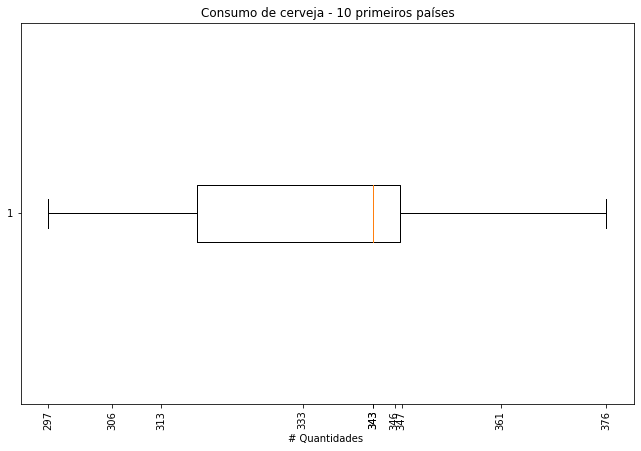

In [75]:
plt.figure(figsize =(11, 7))
plt.boxplot(dataset['beer_servings'].sort_values(ascending=False)[0:10],vert = 0)
plt.xticks(dataset['beer_servings'].sort_values(ascending=False)[0:10],rotation="vertical")
plt.xlabel("# Quantidades ")
plt.title("Consumo de cerveja - 10 primeiros países")
plt.show()

### Gráfico de Pontos (Scatter Plot)

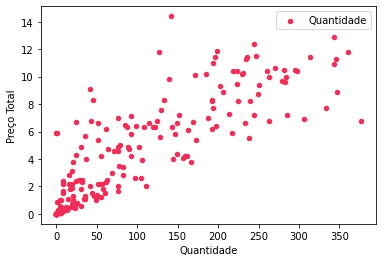

In [81]:
dataset.plot.scatter(x='beer_servings', y='total_litres_of_pure_alcohol', c='#EF2D56',label = "Quantidade")
plt.xlabel('Quantidade')
plt.ylabel('Preço Total')
plt.show()

### Gráfico de linhas

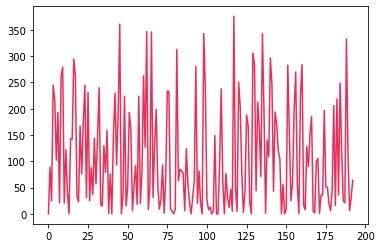

In [83]:
dataset['beer_servings'].plot(c='#EF2D56')
plt.show()

### Histograma

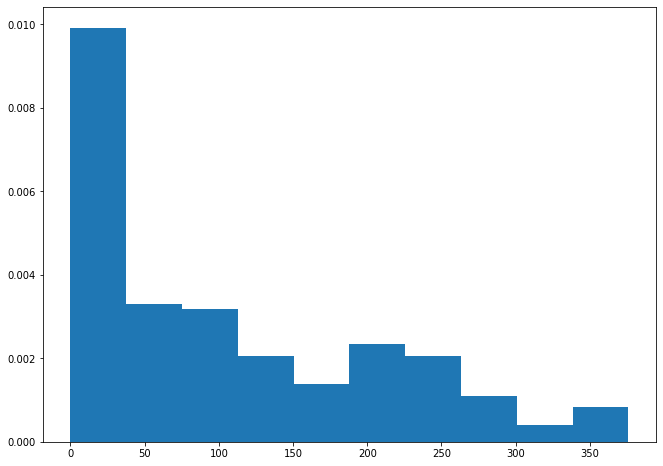

In [87]:
plt.figure(figsize =(11, 8))
plt.hist(dataset['beer_servings'], density=True)
plt.show()

### Gráfico de pizzas

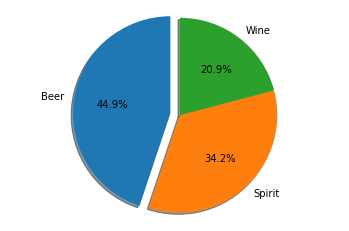

In [90]:
labels = 'Beer', 'Spirit', 'Wine'
sizes = [dataset['beer_servings'].sum(), dataset['spirit_servings'].sum(), 	dataset['wine_servings'].sum()]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Exportando o colab para pdf

In [91]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('first_unit.ipynb')

MessageError: ignored